In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("dataset.csv")

In [ ]:
df.isna().sum()

timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE               3107
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                   81
label_source                          0
Length: 278, dtype: int64

In [ ]:
df = df.drop(df.columns[df.isnull().sum() > 2000], axis=1)

In [ ]:
import pandas as pd

df = df.fillna(df.mean())

<ipython-input-21-41e0044007d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_features.fillna(location_features.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


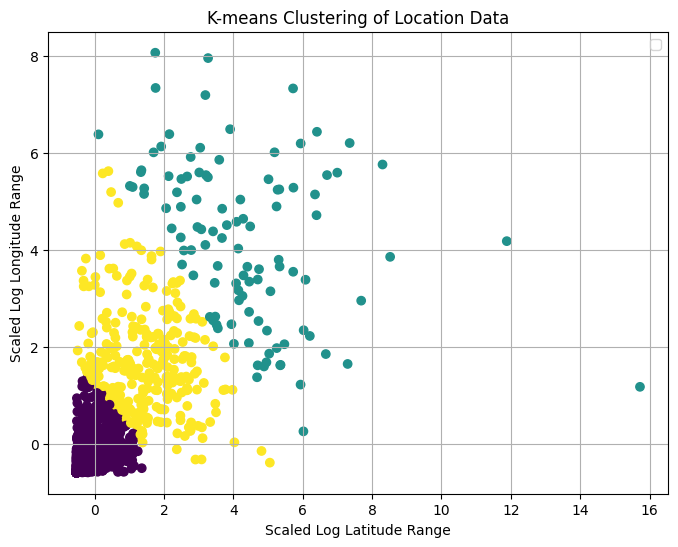

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
location_features = df[['location:log_latitude_range', 'location:log_longitude_range']]
location_features.fillna(location_features.mean(), inplace=True)

scaler = StandardScaler()
location_features_scaled = scaler.fit_transform(location_features)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(location_features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(location_features_scaled[:, 0], location_features_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering of Location Data')
plt.xlabel('Scaled Log Latitude Range')
plt.ylabel('Scaled Log Longitude Range')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-34-8656bb3a7aaa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = clusters


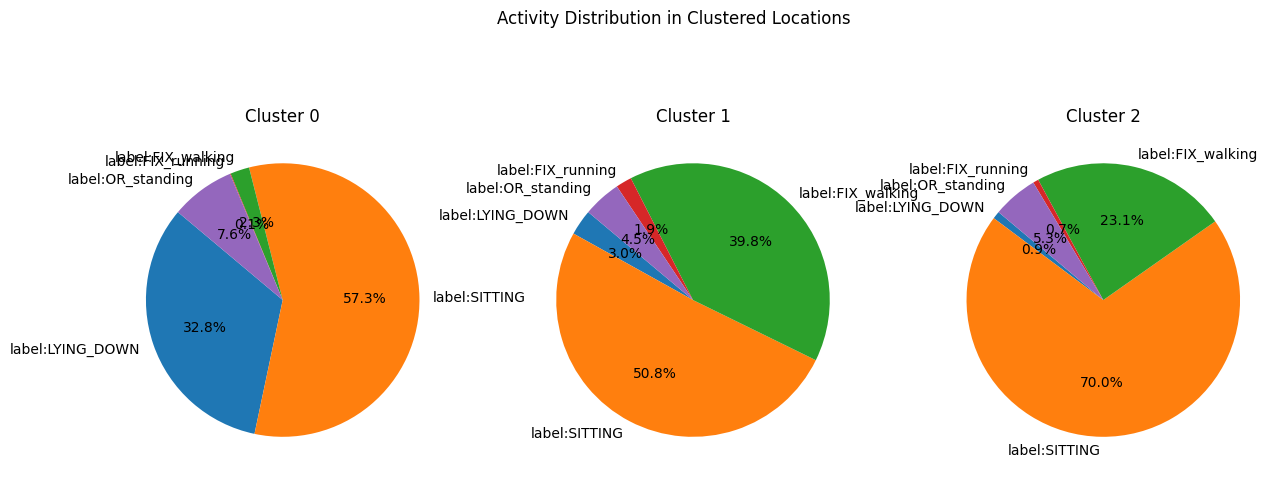

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

activity_columns = ['label:LYING_DOWN', 'label:SITTING', 'label:FIX_walking', 'label:FIX_running', 'label:OR_standing']
filtered_df = df[activity_columns]
filtered_df['cluster'] = clusters
activity_percentages = filtered_df.groupby('cluster').mean() * 100
fig, axs = plt.subplots(1, len(activity_percentages), figsize=(15, 6))
fig.suptitle('Activity Distribution in Clustered Locations')

for i, (cluster, percentages) in enumerate(activity_percentages.iterrows()):
    axs[i].pie(percentages, labels=activity_columns, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Cluster {cluster}')
    print()

plt.show()
